### Real World: AI, Machine Learning and Data Science example

## Why Python?

Python is a general programming language that can do both Software development, Web development, sophisticated mathematical / statistical modeling. 

## Everything is free

All the packages, modules, libraries, and implementations are free. Anyone can download them in any part of the world.

**Examples of great, free AI libraries**
* Google's TensorFlow
* Facebook's React
* Scikit-learn
* Pandas
* Keras
* Spark

## Can implement all State-of-the-Art algorithms

No matter if you want to use Linear Regression, Random Forests, Neural Networks, or Deep Learning all of the latest research and enterprise methods are implemented in Python.

## Big Data Compatible

Code, programs, and software created with Python can be run on any computer, even processors in the cloud. Therefore, you can scale your computations arbitrarily and utilize 

**Great tools for big data computations:**
- Spark
- Databricks
- Amazon EC2
- Amazon S3
- MLFlow

# The difficult part is never to implement the algorithm

The hard part of a machine learning problem is to get the correct data that can solve your problem. We'll illustrate this with an example below.

## Realworld example of AI. 

Titanic notebook! Open Source: Anyone can do this! We host all our teaching materials online. Democratize it. 

Startups can and develop AI solutions constantly. Everything is free!

![data-x](http://oi64.tinypic.com/o858n4.jpg)


# __Titanic Survivor Analysis__


**Sources:** 
* **Training + explanations**: https://www.kaggle.com/c/titanic

___
___



# Understanding the connections between passanger information and survival rate

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**Our task is to train a machine learning model on the training set in order to predict if the passengers in the test set survived or not.**

### Import packages

In [2]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from plot_distribution import plot_distribution

/home/afo/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Load Data

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combine = [train_df, test_df]

<a id='sec3'></a>
___
## Part 2: Exploring and Preprocessing the Data
**Data descriptions**

<img src="data/Titanic_Variable.png">

In [4]:
# preview the data
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# General data statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Histograms

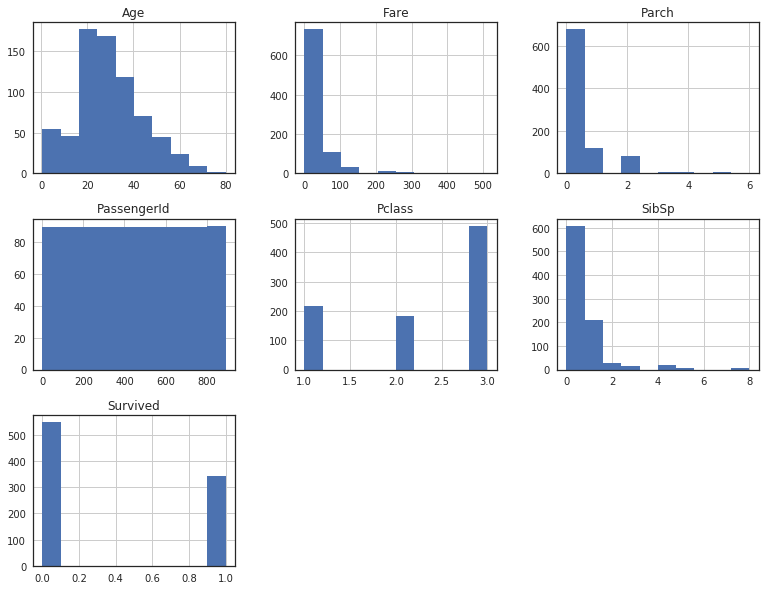

In [6]:
train_df.hist(figsize=(13,10));

In [7]:
# Balanced data set?
train_df['Survived'].map({0:'Died',1:'Survived'}).value_counts()

Died        549
Survived    342
Name: Survived, dtype: int64

___

> #### __Brief Remarks Regarding the Data__

> * `PassengerId` is a random number (incrementing index) and thus does not contain any valuable information. 

> * `Survived, Passenger Class, Age, Siblings Spouses, Parents Children` and `Fare` are numerical values (no need to transform them) -- but, we might want to group them (i.e. create categorical variables). 

> * `Sex, Embarked` are categorical features that we need to map to integer values. `Name, Ticket` and `Cabin` might also contain valuable information.

___

### Dropping Unnecessary data
__Note:__ It is important to remove variables that convey information already captured by some other variable. Doing so removes the correlation, while also diminishing potential overfit.

In [8]:
# Drop columns 'Ticket', 'Cabin', need to do it for both test and training

train_df = train_df.drop(['PassengerId','Ticket', 'Cabin','Fare'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Fare'], axis=1)
combine = [train_df, test_df]

<a id='sec4'></a>
____
## Part 3: Establishing Hypotheses

### _The Title of the person is a feature that can predict survival_

In [9]:
# List example titles in Name column
train_df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [10]:
# Create column called Title
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',\
                                                expand=False)

In [11]:
# Double check that our titles makes sense (by comparing to sex)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [12]:
# Create Title columns
for dataset in combine:
    dataset['Title'] = dataset['Title'].\
                  replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') #Mademoiselle
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') #Madame

In [13]:
# We now have more logical (contemporary) titles, and fewer groups

train_df[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


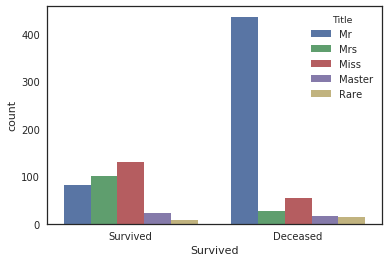

In [14]:
# We can plot the survival chance for each title

sns.countplot(x='Survived', hue="Title", data=train_df, order=[1,0])
plt.xticks(range(2),['Survived','Deceased']);

In [15]:
# Title dummy mapping: Map titles to binary dummy columns

for dataset in combine:
    binary_encoded = pd.get_dummies(dataset.Title)
    dataset[binary_encoded.columns] = binary_encoded

In [16]:
# Remove unique variables for analysis (Title is generally bound to Name, so it's also dropped)
train_df = train_df.drop(['Name', 'Title'], axis=1)
test_df = test_df.drop(['Name', 'Title'], axis=1)
combine = [train_df, test_df]

In [17]:
# sanity check

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,male,22.0,1,0,S,0,0,1,0,0
1,1,1,female,38.0,1,0,C,0,0,0,1,0
2,1,3,female,26.0,0,0,S,0,1,0,0,0
3,1,1,female,35.0,1,0,S,0,0,0,1,0
4,0,3,male,35.0,0,0,S,0,0,1,0,0


### Map Sex column to binary (male = 0, female = 1) categories

In [18]:
# convert categorical variable to numeric
for dataset in combine:
    dataset['Sex'] = dataset['Sex']. \
        map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,0,22.0,1,0,S,0,0,1,0,0
1,1,1,1,38.0,1,0,C,0,0,0,1,0
2,1,3,1,26.0,0,0,S,0,1,0,0,0
3,1,1,1,35.0,1,0,S,0,0,0,1,0
4,0,3,0,35.0,0,0,S,0,0,1,0,0


### Handle missing values for age
We will now guess values of age based on sex (male / female) 
and socioeconomic class (1st, 2nd, 3rd) of the passenger.

The row indicates the sex, male = 0, female = 1

> __IDEA:__ Wealth (indicated by class accomodation), as well as Gender, historically are indicative of age. 

> This approach gives us a more refined estimate than only taking the median / mean, etc. 

In [19]:
# create empty array  for later use

guess_ages = np.zeros((2,3),dtype=int) 
guess_ages

array([[0, 0, 0],
       [0, 0, 0]])

In [20]:
# Fill the NA's for the Age columns
# with "qualified guesses"

for idx,dataset in enumerate(combine):  
    # method adds a counter to an iterable and returns it in a form of enumerate object.     
    if idx==0:
        print('Working on Training Data set\n')
    else:
        print('-'*35)
        print('Working on Test Data set\n')
    
    print('Guess values of age based on sex and pclass of the passenger...')
    for i in range(0, 2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) \
                        &(dataset['Pclass'] == j+1)]['Age'].dropna()

            # Extract the median age for this group
            # (less sensitive) to outliers
            age_guess = guess_df.median()
          
            # Convert random age float to int
            guess_ages[i,j] = int(age_guess)
    
            
    print('Guess_Age table:\n',guess_ages)
    print ('\nAssigning age values to NAN age values in the dataset...')
    
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) \
                    & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
                    

    dataset['Age'] = dataset['Age'].astype(int)
    print()
print('Done! \n\n\n')
train_df.head()

Working on Training Data set

Guess values of age based on sex and pclass of the passenger...
Guess_Age table:
 [[40 30 25]
 [35 28 21]]

Assigning age values to NAN age values in the dataset...

-----------------------------------
Working on Test Data set

Guess values of age based on sex and pclass of the passenger...
Guess_Age table:
 [[42 28 24]
 [41 24 22]]

Assigning age values to NAN age values in the dataset...

Done! 





,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,0,22,1,0,S,0,0,1,0,0
1,1,1,1,38,1,0,C,0,0,0,1,0
2,1,3,1,26,0,0,S,0,1,0,0,0
3,1,1,1,35,1,0,S,0,0,0,1,0
4,0,3,0,35,0,0,S,0,0,1,0,0


### Split age into bands / categorical ranges and look at survival rates

In [21]:
# Age bands
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False)\
                    .mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


### Distribution of suvival relative to age

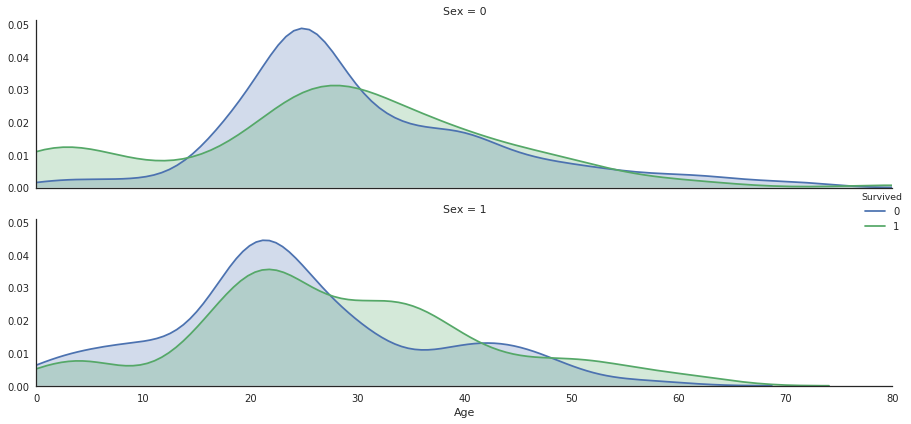

In [22]:
# Plot distributions of Age of passangers who survived 
# or did not survive

plot_distribution( train_df , var = 'Age' , target = 'Survived' ,\
                  row = 'Sex' )

# Recall: {'male': 0, 'female': 1}

In [23]:
# Change Age column to
# map Age ranges (AgeBands) to integer values of categorical type 

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
train_df.head()

# Note we could just run 
# dataset['Age'] = pd.cut(dataset['Age'], 5,labels=[0,1,2,3,4])

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare,AgeBand
0,0,3,0,1,1,0,S,0,0,1,0,0,"(16.0, 32.0]"
1,1,1,1,2,1,0,C,0,0,0,1,0,"(32.0, 48.0]"
2,1,3,1,1,0,0,S,0,1,0,0,0,"(16.0, 32.0]"
3,1,1,1,2,1,0,S,0,0,0,1,0,"(32.0, 48.0]"
4,0,3,0,2,0,0,S,0,0,1,0,0,"(32.0, 48.0]"


In [24]:
# remove AgeBand column

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,0,1,1,0,S,0,0,1,0,0
1,1,1,1,2,1,0,C,0,0,0,1,0
2,1,3,1,1,0,0,S,0,1,0,0,0
3,1,1,1,2,1,0,S,0,0,0,1,0
4,0,3,0,2,0,0,S,0,0,1,0,0


### Travel Party Size

How did the number of people the person traveled with impact the chance of survival?

In [25]:
# SibSp = Number of Sibling / Spouses
# Parch = Parents / Children

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Survival chance against FamilySize
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True) \
                                .mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


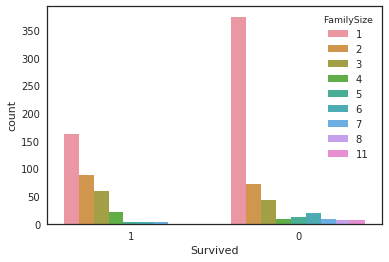

In [26]:
# Plot it, 1 is survived

sns.countplot(x='Survived', hue="FamilySize", data=train_df, order=[1,0]);

In [27]:
# Create binary variable if the person was alone or not

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [28]:
# We will only use the binary IsAlone feature for further analysis

for df in combine:
    df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)


train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Master,Miss,Mr,Mrs,Rare,IsAlone
0,0,3,0,1,S,0,0,1,0,0,0
1,1,1,1,2,C,0,0,0,1,0,0
2,1,3,1,1,S,0,1,0,0,0,1
3,1,1,1,2,S,0,0,0,1,0,0
4,0,3,0,2,S,0,0,1,0,0,1


# Feature construction

In [29]:
# We can also create new features based on intuitive combinations
# Here is an example when we say that the age times socioclass is a determinant factor

for dataset in combine:
    dataset['Age*Class'] = dataset.Age.values * dataset.Pclass.values

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


### Port the person embarked from
Let's see how that influences chance of survival

<img src= "data/images/titanic_voyage_map.png">
>___

> #### __Interesting Fact:__ 

> Third Class passengers were the first to board, with First and Second Class passengers following up to an hour before departure. 

> Third Class passengers were inspected for ailments and physical impairments that might lead to their being refused entry to the United States, while First Class passengers were personally greeted by Captain Smith.

In [30]:
# Fill NaN 'Embarked' Values in the datasets
freq_port = train_df['Embarked'].dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True) \
                    .mean().sort_values(by='Survived', ascending=False)


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [31]:
# Create categorical dummy variables for Embarked values

for dataset in combine:
    binary_encoded = pd.get_dummies(dataset.Embarked)
    dataset[binary_encoded.columns] = binary_encoded

train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Master,Miss,Mr,Mrs,Rare,IsAlone,Age*Class,C,Q,S
0,0,3,0,1,S,0,0,1,0,0,0,3,0,0,1
1,1,1,1,2,C,0,0,0,1,0,0,2,1,0,0
2,1,3,1,1,S,0,1,0,0,0,1,3,0,0,1
3,1,1,1,2,S,0,0,0,1,0,0,2,0,0,1
4,0,3,0,2,S,0,0,1,0,0,1,6,0,0,1


In [32]:
# Drop Embarked

for dataset in combine:
    dataset.drop('Embarked', axis=1, inplace=True)

### Finished -- Preprocessing Complete!

In [33]:
# All features are approximately on the same scale
# no need for feature engineering / normalization

train_df.head(7)

,Survived,Pclass,Sex,Age,Master,Miss,Mr,Mrs,Rare,IsAlone,Age*Class,C,Q,S
0,0,3,0,1,0,0,1,0,0,0,3,0,0,1
1,1,1,1,2,0,0,0,1,0,0,2,1,0,0
2,1,3,1,1,0,1,0,0,0,1,3,0,0,1
3,1,1,1,2,0,0,0,1,0,0,2,0,0,1
4,0,3,0,2,0,0,1,0,0,1,6,0,0,1
5,0,3,0,1,0,0,1,0,0,1,3,0,1,0
6,0,1,0,3,0,0,1,0,0,1,3,0,0,1


### Sanity Check: View the correlation between features in our processed dataset

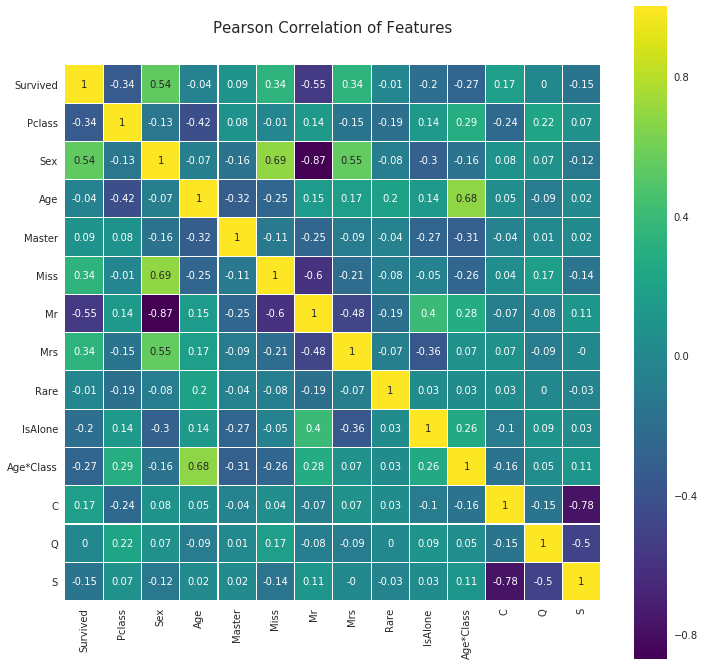

In [34]:
# Uncorrelated features are generally more powerful predictors

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

<a id='sec5'></a>
___
### Machine Learning, Prediction and Artifical Intelligence
Now we will use Machine Learning algorithms in order to predict if the person survived. 

**We will choose the best model from:**
1. Logistic Regression
2. K-Nearest Neighbors (KNN) 
3. Support Vector Machines (SVM)
4. Perceptron
5. XGBoost
6. Random Forest

### Setup Training and Validation Sets

In [35]:
X = train_df.drop("Survived", axis=1) # Training & Validation data
Y = train_df["Survived"]              # Response / Target Variable

print(X.shape, Y.shape)

(891, 13) (891,)


In [36]:
# Split training set so that we validate on 20% of the data
# Note that our algorithms will never have seen the validation 
# data during training. This is to evaluate how good our estimators are.

np.random.seed(1337) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = \
                train_test_split(X, Y, test_size=0.2)

print('Training Samples:', X_train.shape, Y_train.shape)
print('Validation Samples:', X_val.shape, Y_val.shape)

Training Samples: (712, 13) (712,)
Validation Samples: (179, 13) (179,)


___
> ## General ML workflow
> 1. Create Model Object
> 2. Train the Model
> 3. Predict on _unseen_ data
> 4. Evaluate accuracy.

___

## Compare Different Prediciton Models

### 1. Logistic Regression

In [37]:
logreg = LogisticRegression()           # create
logreg.fit(X_train, Y_train)            # train
acc_log_2 = logreg.score(X_val, Y_val)  # predict & evaluate

print('Logistic Regression accuracy:',\
      str(round(acc_log_2*100,2)),'%')

Logistic Regression accuracy: 78.77 %


### 2. K-Nearest Neighbour

In [38]:
knn = KNeighborsClassifier(n_neighbors = 3)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')                                

K-Nearest Neighbors labeling accuracy: 78.77 %


### 3. Support Vector Machine

In [39]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 82.12 %


### 4. Perceptron

In [40]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 72.63 %


### 5. Gradient Boosting

In [43]:
# XGBoost, same API as scikit-learn
gradboost = xgb.XGBClassifier(n_estimators=1000)             # instantiate
gradboost.fit(X_train, Y_train)                              # fit
acc_xgboost = gradboost.score(X_val, Y_val)                  # predict + evalute

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 81.56 %


/home/afo/anaconda3/envs/data-x/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 6. Random Forest

In [44]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('Random Forest labeling accuracy:', str(round(acc_rf*100,2)),'%')

Random Forest labeling accuracy: 80.45 %


### 7. Neural Networks



In [45]:
X_train.shape

(712, 13)

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from keras.layers import Dense

model = Sequential()

In [58]:

model.add( Dense(units=64, activation='relu', input_shape=(13,) ))
model.add( Dense(units=1, activation='softmax') )

In [59]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# Fit the model by iterating over the training data in batches

model.fit(X_train, Y_train, epochs = 50, batch_size= 32)

# # Evaluate the model Accuracy on test set
model.evaluate(X_test, Y_test, batch_size=60,verbose=False)[1]

ValueError: You are passing a target array of shape (712, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

### Importance scores in the random forest model

In [ ]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

<a id='sec6'></a>
___

## Appendix I:
#### Why are our models maxing out at around 80%?


#### __John Jacob Astor__

<img src= "data/images/john-jacob-astor.jpg"> 

John Jacob Astor perished in the disaster even though our model predicted he would survive. Astor was the wealthiest person on the Titanic -- his ticket fare was valued at over 35,000 USD in 2016 -- it seems likely that he would have been among of the approximatelly 35 percent of men in first class to survive. However, this was not the case: although his pregnant wife survived, John Jacob Astor’s body was recovered a week later, along with a gold watch, a diamond ring with three stones, and no less than 92,481 USD (2016 value) in cash.

<br >


#### __Olaus Jorgensen Abelseth__

<img src= "data/images/olaus-jorgensen-abelseth.jpg">

Avelseth was a 25-year-old Norwegian sailor, a man in 3rd class, and not expected to survive by classifier. However, once the ship sank, he survived by swimming for 20 minutes in the frigid North Atlantic water before joining other survivors on a waterlogged collapsible boat.

Abelseth got married three years later, settled down as a farmer in North Dakota, had 4 kids, and died in 1980 at the age of 94.

<br >

### __Key Takeaway__ 

As engineers and business professionals, we are trained to as ourselves, what could we do to improve on an 80 percent average. As it is often the case, it’s easy to forget that these data points represent real people. Each time our model was wrong we should be glad -- in such misclasifications we will likely find incredible stories of human nature and courage triumphing over extremely difficult odds. 

__It is important to never lose sight of the human element when analyzing data that deals with people.__ 

<a id='sec7'></a>
___
## Appendix II: Resources and references to material we won't cover in detail

> * **Gradient Boosting:** http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

> * **Jupyter Notebook (tutorial):** https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

> * **K-Nearest Neighbors (KNN):** https://towardsdatascience.com/introduction-to-k-nearest-neighbors-3b534bb11d26

> * **Logistic Regression:** https://towardsdatascience.com/5-reasons-logistic-regression-should-be-the-first-thing-you-learn-when-become-a-data-scientist-fcaae46605c4

> * **Naive Bayes:** http://scikit-learn.org/stable/modules/naive_bayes.html

> * **Perceptron:** http://aass.oru.se/~lilien/ml/seminars/2007_02_01b-Janecek-Perceptron.pdf

> * **Random Forest:** https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

> * **Support Vector Machines (SVM):** https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989


<br>
___
___

![](http://i67.tinypic.com/2jcbwcw.png)